In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [3]:
#According to Part A question 1 there are 20 features and 2000 samples in the distribution
features = 20
n = 2000
print("___________________________Answer to Question 1_________________________________________ \n")

In [4]:
#Finding the mean of the distribution
def dist_mean(n):
    return np.random.rand(n)

#Finding the covariance of the distribution
def dist_covar(n):
    A= np.random.rand(n,n)
    covariance = np.dot(A, A.transpose())
    return A

In [9]:
#Calculating the means of 2 classes
mean_0 = dist_mean(features)
mean_1 = mean_0 +2* dist_mean(features)


#Covariance matrix of 2 classes
covar = dist_covar(features)

print("Covariance matrix for classes X and Y ::::::\n" , covar)


Covariance matrix ::::::
 [[4.59026914e-01 4.44150576e-01 8.17359995e-01 7.43829130e-01
  1.08129384e-01 8.88961278e-01 1.26908775e-01 3.56997245e-02
  6.41255657e-01 8.12831409e-01 7.38054834e-01 4.28894197e-01
  2.87038022e-02 5.51175091e-01 5.03461873e-02 4.64341992e-01
  1.48744815e-01 8.77808779e-01 4.94967622e-01 3.13456989e-01]
 [9.14891290e-01 9.85384236e-02 8.16524926e-01 8.10468057e-02
  9.42600737e-01 6.30303375e-01 9.88021652e-01 3.34427534e-01
  7.65403320e-01 3.46704864e-01 4.33609717e-01 2.83327581e-01
  7.21652867e-01 2.15677305e-01 3.05907766e-01 3.97959544e-01
  9.38727328e-01 2.16581887e-01 7.81976676e-01 2.44283390e-01]
 [1.50055819e-01 6.62578472e-01 2.63653055e-01 8.63920813e-01
  5.35933627e-01 3.24076456e-01 1.98348860e-01 3.12539179e-01
  1.13988358e-01 7.68455027e-01 1.32370320e-01 6.23462935e-01
  6.19461109e-01 7.32792865e-01 4.27939682e-01 1.75612840e-01
  8.83538470e-01 8.00561884e-01 1.54940132e-01 7.57972929e-01]
 [6.87522535e-01 3.66694677e-01 4.0835423

C:\Users\abarat\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  
C:\Users\abarat\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


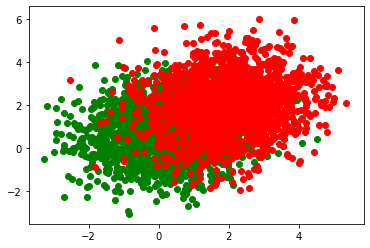

In [10]:
#Obtain the multivariate distribution for class 0 & 1
class_0 = np.random.multivariate_normal(mean_0, covar, n)
class_1 = np.random.multivariate_normal(mean_1, covar, n)

#Plot both classes to show the overlap
plt.scatter(class_0[:,0], class_0[:,1], color ='green')
plt.scatter(class_1[:,0], class_1[:,1], color = 'red')

print("___________________________Scatter Diagram of 2 classes X(green) and Y(red)_________________________________________ \n")

plt.show()



In [11]:
from sklearn.model_selection import train_test_split

X = np.random.rand(n, features)
y = np.array([[1 for _ in range(int(n/2)) ], [0 for _ in range(int (n/2))]]). ravel()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y , test_size = 0.3 , random_state =10)
DS1 = Xtest

print("Xtrain and Xtest shapes :: \n")

print(Xtrain.shape , Xtest.shape)

print("ytrain and ytest shapes :: \n")
print(ytrain.shape , ytest.shape)

Xtrain and Xtest shapes :: 

(1400, 20) (600, 20)
ytrain and ytest shapes :: 

(1400,) (600,)


In [14]:
#---------------------------2. Linear Classification ----------------------------#
print("___________________________Answer to Question 2_________________________________________ \n")
#Importing Stochastic Gradient Descent Classifier for linear classification
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()

#training the classifier
clf.fit(Xtrain, ytrain)

print("Coefficients learnt for Linear Classifier:::::::::::::::\n", clf.coef_)

#testing on the training set 
predict_training = clf.predict(Xtrain)

#testing on the test set
predict_test = clf.predict(Xtest)

from sklearn.metrics import classification_report

#printing results on training set 
print("Results of Linear Classification on the training set are :::::::::::::::: \n")
print(classification_report(ytrain, predict_training))

#printing results on test 
print("Results of Linear Classification on the test are :::::::::::::::: \n")
print(classification_report(ytest, predict_test))

___________________________Answer to Question 2_________________________________________ 

Coefficients learnt for Linear Classifier:::::::::::::::
 [[-0.22307286 -0.25645516 -0.13414231  0.78127622  0.00585741  0.02423993
  -0.92928414 -0.40588433 -0.20257899  0.03534471 -0.23915428 -0.00122009
   0.46546661 -0.81770583 -0.51603534  0.02309113  0.04995469  0.28394915
  -0.41174267  0.33099656]]
Results of Linear Classification on the training set are :::::::::::::::: 

              precision    recall  f1-score   support

           0       0.51      0.91      0.65       702
           1       0.57      0.13      0.21       698

    accuracy                           0.52      1400
   macro avg       0.54      0.52      0.43      1400
weighted avg       0.54      0.52      0.43      1400

Results of Linear Classification on the test are :::::::::::::::: 

              precision    recall  f1-score   support

           0       0.50      0.86      0.63       298
           1       0.

In [21]:
#---------------------------3. K Nearest Neighbours ----------------------------#
print("___________________________Answer to Question 3_________________________________________ \n")
#Importing K nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 1000)

#training the classifier
clf.fit(Xtrain, ytrain)

#testing on the training set 
predict_training = clf.predict(Xtrain)

#testing on the test set
predict_test = clf.predict(Xtest)

from sklearn.metrics import classification_report

#printing results on training set 
print("Results of K-NN on the training set are :::::::::::::::: \n")
print(classification_report(ytrain, predict_training))

#printing results on test 
print("Results of K-NN the test are :::::::::::::::: \n")
print(classification_report(ytest, predict_test))

___________________________Answer to Question 3_________________________________________ 

Results of K-NN on the training set are :::::::::::::::: 

              precision    recall  f1-score   support

           0       0.52      0.73      0.60       702
           1       0.53      0.31      0.39       698

    accuracy                           0.52      1400
   macro avg       0.52      0.52      0.50      1400
weighted avg       0.52      0.52      0.50      1400

Results of K-NN the test are :::::::::::::::: 

              precision    recall  f1-score   support

           0       0.51      0.71      0.59       298
           1       0.53      0.31      0.39       302

    accuracy                           0.51       600
   macro avg       0.52      0.51      0.49       600
weighted avg       0.52      0.51      0.49       600

